In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
import seaborn as sns
import math
import numpy as np
import matplotlib.patches as patches
from matplotlib.patches import FancyArrow
from pathlib import Path

In [2]:
# Read in the data
df = pd.read_csv('../Data/data_clean.csv',
                 parse_dates=['Date', 'Date of Birth'],
                 delimiter=';',
                 )

In [3]:
df.tail()

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Time_s,Age
18236,1000,00:03:33.250000,Noureddine Morceli,ALG,1970-02-28,1.0,Moskva,1995-06-05,Men,1500 m,213.25,25.282192
18237,1000,00:03:33.250000,Paul Korir,KEN,1977-07-15,5.0,Zürich,2003-08-15,Men,1500 m,213.25,26.101370
18238,1000,00:03:33.250000,Hudson Santos de Souza,BRA,1977-02-25,5.0,Rieti,2005-08-28,Men,1500 m,213.25,28.523288
18239,1000,00:03:33.250000,Issac Songok,KEN,1984-04-25,2.0,Stockholm,2006-07-25,Men,1500 m,213.25,22.263014
18240,1000,00:03:33.250000,Bethwell Birgen,KEN,1988-08-06,7.0,Lausanne,2012-08-23,Men,1500 m,213.25,24.063014


In [4]:
#Add a column with only year
df['Year'] = df['Date'].dt.year

# List all unique events in the df
unique_events = df['Event'].unique()

# Set the style for the plots
sns.set(style="whitegrid")

# Filter and sort the events based on Olympic distances and half marathon
sorted_events = ['100 m', '200 m', '400 m', '800 m', '1500 m', '5000 m', '10,000 m', 'Half marathon', 'Marathon']

# Hide a particular outlayer datapoint
# df.loc[df['Time_s'] == 862.47, 'Time_s'] = np.nan
# df.loc[df['Time_s'] == 871.76, 'Time_s'] = np.nan
# df.loc[df['Time_s'] == 876.84, 'Time_s'] = np.nan


In [5]:
df.head()

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Time_s,Age,Year
0,1,00:01:40.910000,David Rudisha,KEN,1988-12-17,1.0,London,2012-09-08,Men,800 m,100.91,23.742466,2012
1,2,00:01:41.010000,David Rudisha,KEN,1988-12-17,1.0,Rieti,2010-08-29,Men,800 m,101.01,21.712329,2010
2,3,00:01:41.090000,David Rudisha,KEN,1988-12-17,1.0,Berlin,2010-08-22,Men,800 m,101.09,21.693151,2010
3,4,00:01:41.110000,Wilson Kipketer,DEN,1970-12-12,1.0,Köln,1997-08-24,Men,800 m,101.11,26.717808,1997
4,5,00:01:41.240000,Wilson Kipketer,DEN,1970-12-12,1.0,Zürich,1997-08-13,Men,800 m,101.24,26.687671,1997


In [6]:
# -------- Fontproperties ------------------

title_font = mpl.font_manager.FontProperties(
    fname=Path("../Fonts/Oswald/static/Oswald-Regular.ttf"),
    size=18,
    weight="normal",
)

subtitle_font = mpl.font_manager.FontProperties(
    fname=Path("../Fonts/Roboto/Roboto-Medium.ttf"),
    size=12,
    weight="normal",
)

annotations_font = mpl.font_manager.FontProperties(
    fname=Path("../Fonts/Roboto/Roboto-Light.ttf"),
    size=12,
    weight="normal",
)

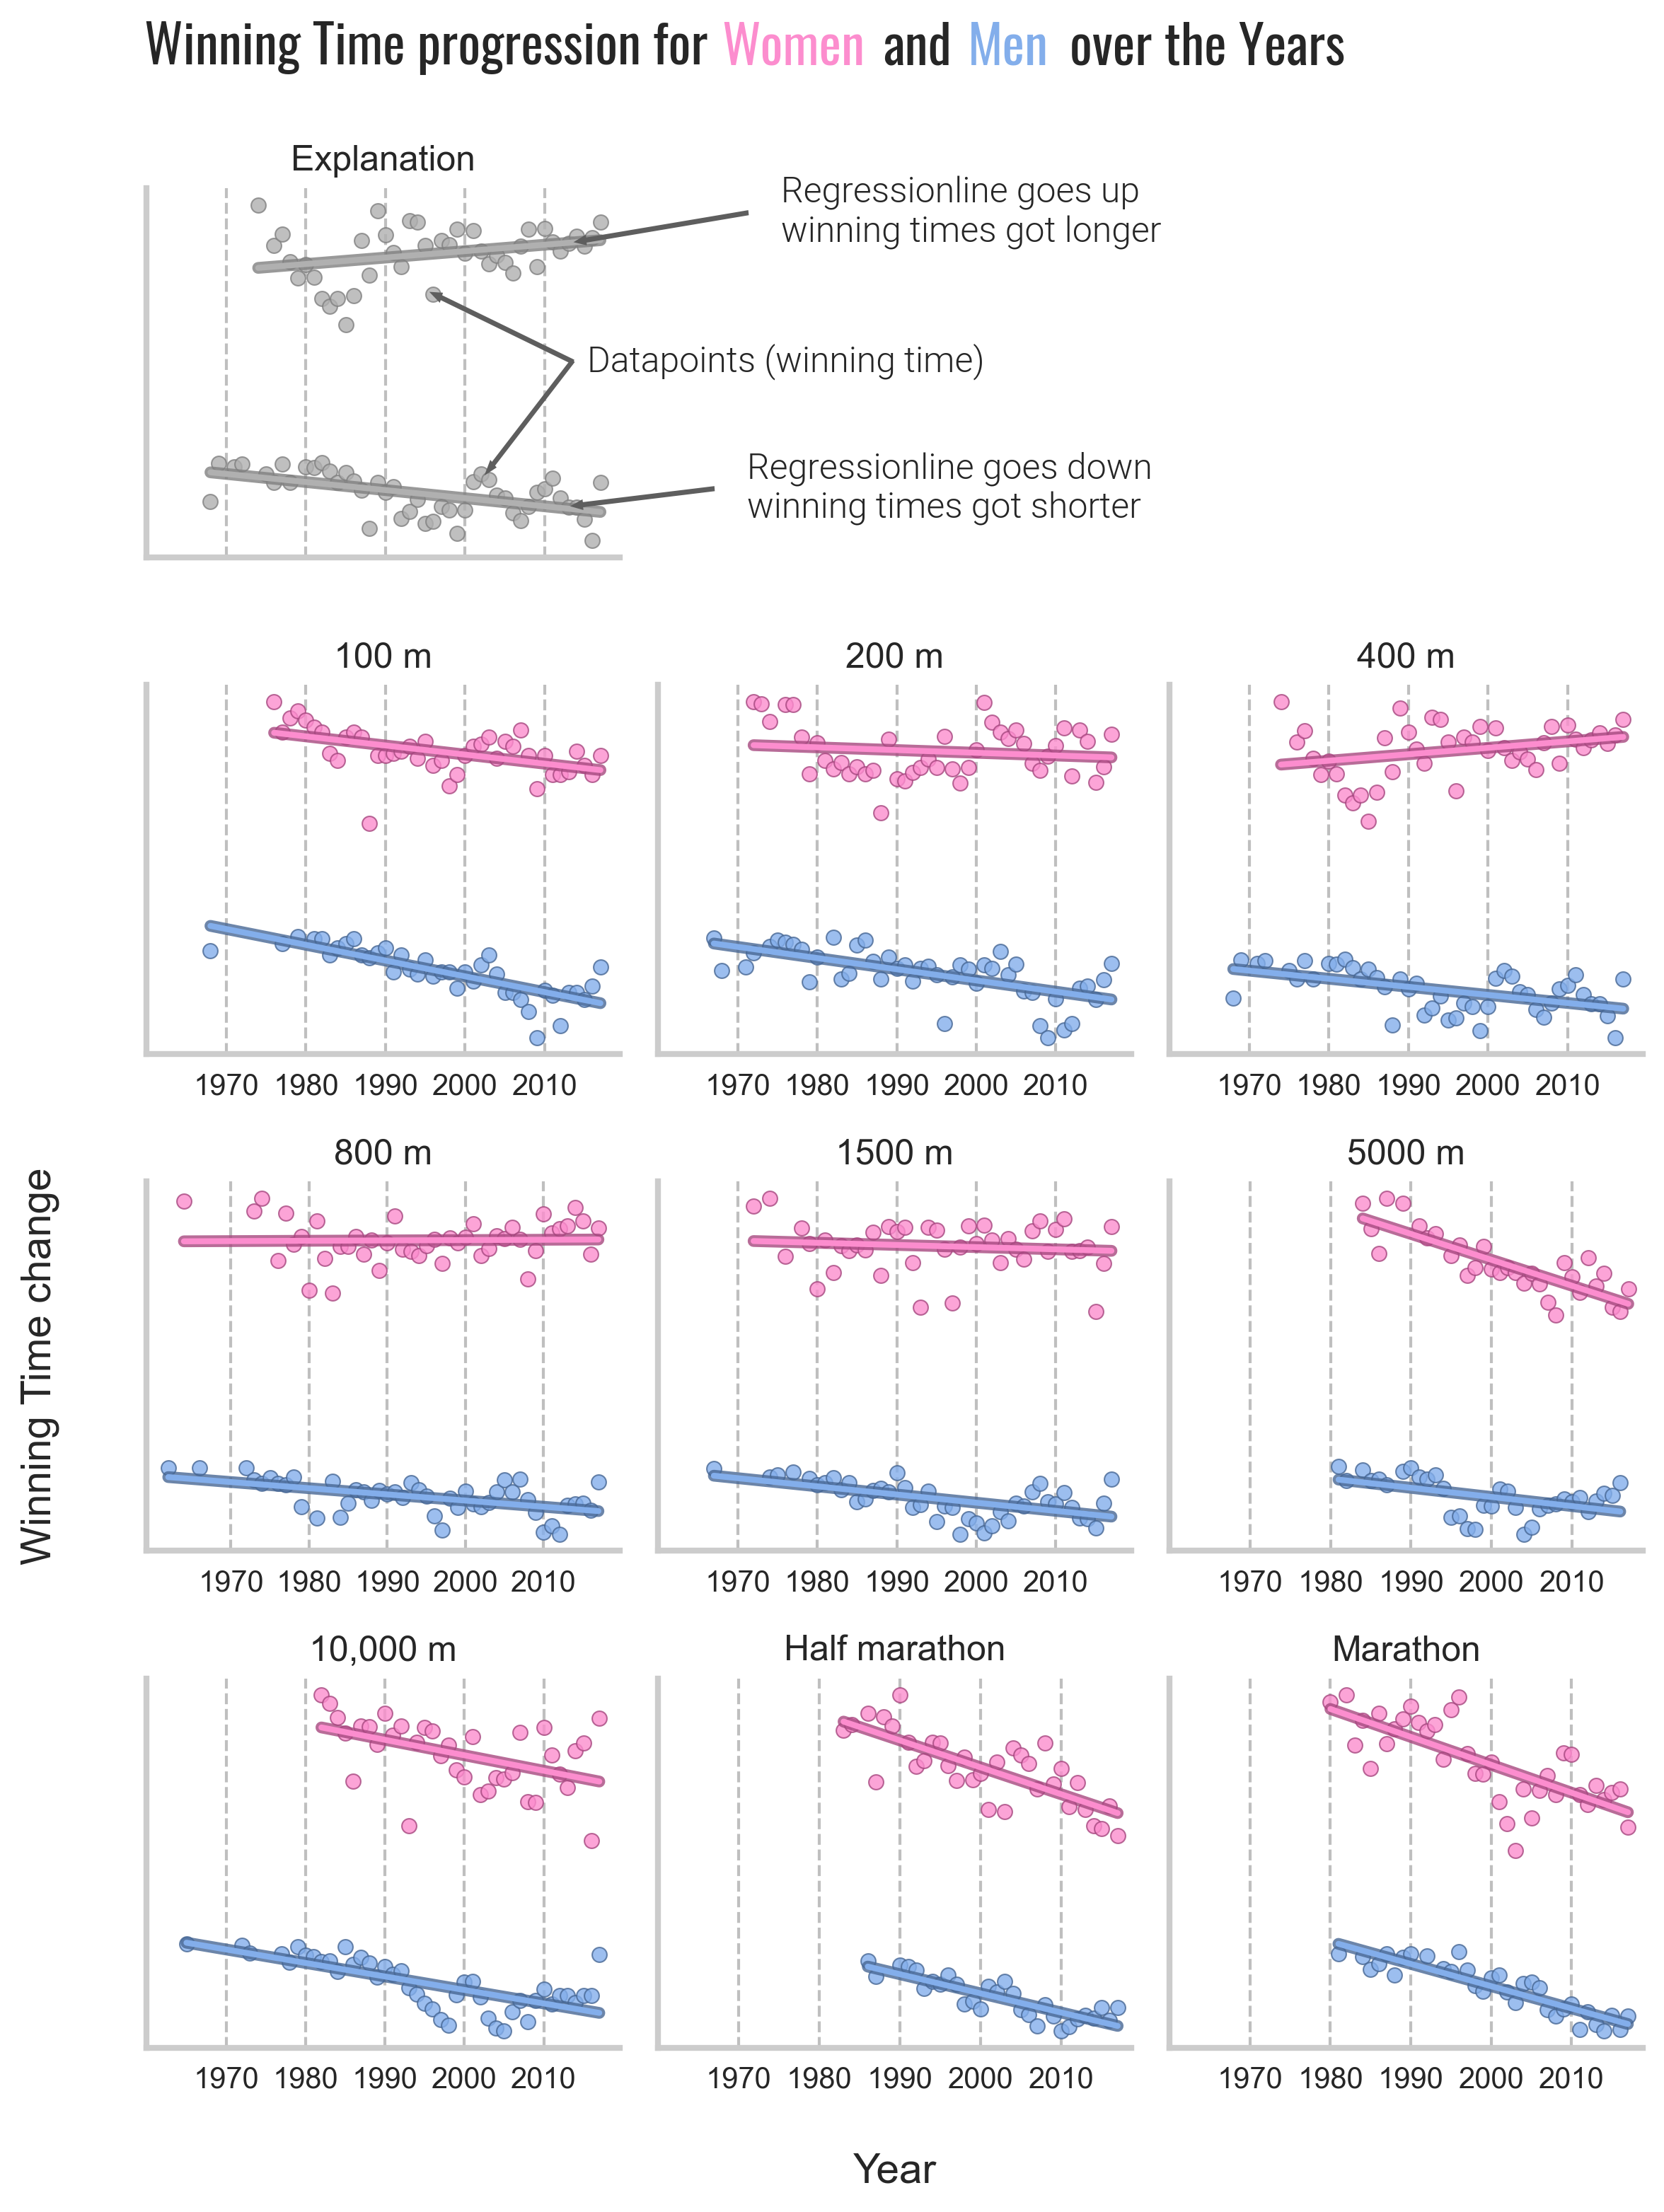

In [14]:
# Determine the number of rows and columns for the subplots
n = len(sorted_events)
ncols = 3  # Number of columns
nrows = 4  # Number of rows

width = 8
height = 10

# Create a figure and axes objects
fig, axes = plt.subplots(nrows, ncols, figsize=(width, height), dpi=300)
fig.subplots_adjust(wspace=0.3, hspace=1)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generates a genderlist used for color, genderspecific plots and the legend
gender_list = ['Women', 'Men']
col_women = '#fc8dce'
col_women_dark = '#a6477f'
col_men = '#83aeeb'
col_men_dark = '#476794'

# Set common xticks
common_xticks = np.arange(1960, 2020, 10)
common_yticks = (25, 50, 75)

# Create subplots
for gen in gender_list:

    # Change the color of the plot for women and men
    if gen == 'Women':
        color = col_women
        edge_color = col_women_dark
    if gen == 'Men':
        color = col_men
        edge_color = col_men_dark

    # Add explanatory subplot
    for idx, event in enumerate(sorted_events):
        if idx == 2:
            ax = axes[0]
            sorted_by_gender = df[df['Gender'] == gen]
            min_time_per_event = sorted_by_gender[sorted_by_gender['Event'] == event].groupby('Year')['Time_s'].min().reset_index()
            
            x = min_time_per_event['Year']
            y = min_time_per_event['Time_s']

            sns.regplot(data=min_time_per_event, x=x, y=y, ax=ax, line_kws={'color': '#808080', 'lw': 4, 'alpha' : 0.8}, scatter=False, ci=None)
            sns.regplot(data=min_time_per_event, x=x, y=y, ax=ax,
                    scatter_kws={'s': 25, 'color': '#b0b0b0', 'edgecolor': '#808080', 'linewidths': 0.5, 'alpha': 0.8},
                    line_kws={"color": '#b0b0b0', "lw": 2, 'alpha': 1},
                    scatter=True, ci=None)

            # Set and modify the Titel of the subplot
            ax.set_title('Explanation')
            ax.title.set_y(1.5)

            if idx in [7]:
                ax.set_xlabel('Year', labelpad=20, fontsize=14)
            else:
                ax.set_xlabel('')

            if idx in [3]:
                ax.set_ylabel('Winning Time change', labelpad=20, fontsize=14)
            else:
                ax.set_ylabel('')

            # # Add the custom legend
            ax.legend("False")
            # Remove the legend
            ax.get_legend().remove()
            # Remove the legend title
            if ax.get_legend() is not None:
                ax.get_legend().set_title('')

            # Remove spines
            sns.despine(left=False, top=True, right=True, bottom=False, ax=ax)
            ax.yaxis.set_ticks_position('none')

            # Change properties for each spine
            for spine in ax.spines.values():
                spine.set_linewidth(2)

            # Set and modify the bottom (x-axis) ticks and tick-labels
            ax.set_xticks(common_xticks)
            ax.tick_params(axis='x', labelsize='small', pad=0.5)

            # Hide the left (y-axis) tick labels
            ax.set_yticklabels([])

            # Remove vertical grid lines
            ax.xaxis.grid(True, linestyle='--', linewidth=1, color='grey', alpha=0.5)

            # Add subtle vertical grid
            ax.yaxis.grid(False)


# ------------------------------ The actual subplots -------------------------------------------------------
    for idx, event in enumerate(sorted_events):
        ax = axes[idx + 3]
        sorted_by_gender = df[df['Gender'] == gen]
        min_time_per_event = sorted_by_gender[sorted_by_gender['Event'] == event].groupby('Year')['Time_s'].min().reset_index()

        x = min_time_per_event['Year']
        y = min_time_per_event['Time_s']

        sns.regplot(data=min_time_per_event, x=x, y=y, ax=ax, line_kws={'color': edge_color, 'lw': 4, 'alpha' : 0.8}, scatter=False, ci=None)
        sns.regplot(data=min_time_per_event, x=x, y=y, ax=ax,
                    scatter_kws={'s': 25, 'color': color, 'edgecolor': edge_color, 'linewidths': 0.5, 'alpha': 0.8},
                    line_kws={"color": color, "lw": 2, 'alpha': 1},
                    scatter=True, ci=None)
        ax.set_title(f'{event}')

        if idx in [7]:
            ax.set_xlabel('Year', labelpad=20, fontsize=14)
        else:
            ax.set_xlabel('')

        if idx in [3]:
            ax.set_ylabel('Winning Time change', labelpad=20, fontsize=14)
        else:
            ax.set_ylabel('')

        # # Add the custom legend
        ax.legend("False")



        # Remove the legend for all
        ax.get_legend().remove()
        # Remove the legend title
        if ax.get_legend() is not None:
            ax.get_legend().set_title('')

        # Remove spines
        sns.despine(left=False, top=True, right=True, bottom=False, ax=ax)
        ax.yaxis.set_ticks_position('none')

        # Change properties for each spine
        for spine in ax.spines.values():
            spine.set_linewidth(2)

        # Set and modify the bottom (x-axis) ticks and tick-labels
        ax.set_xticks(common_xticks)
        ax.tick_params(axis='x', labelsize='small', pad=0.5)

        # Set the left (y-axis) ticks

        # Hide the left (y-axis) tick labels
        ax.set_yticklabels([])

        # Remove vertical grid lines
        ax.xaxis.grid(True, linestyle='--', linewidth=1, color='grey', alpha=0.5)

        # Add subtle vertical grid
        ax.yaxis.grid(False)

        # Force the rendering of the plot for accessing the ticklabels
        fig.canvas.draw()

        axs = axes[6]
        for tick in axs.xaxis.get_major_ticks():
            if tick.label1.get_text() == '1960':
                # Set the gridline style to be invisible for the tick at x = 1960
                tick.gridline.set_linestyle('none')

explanation_subplot = axes[0]
explanation_subplot.set_xticklabels([])

for i in range(0, 12, 1):
    if i != 0:
        axes[i].set_xticks(common_xticks)
        axes[i].set_xticklabels(['', '1970', '1980', '1990', '2000', '2010'])

# Arrow 1 and Annotation 1 for explanationplot
arrow_startx = 0.45
arrow_starty = 0.95
arrow_direction_right = -0.1
arrow_direction_up = -0.0135

annox = 0.47
annoy = 0.95

arrow1 = FancyArrow(arrow_startx, arrow_starty, arrow_direction_right, arrow_direction_up, width=0.001, length_includes_head=True, color='#5e5e5e')
fig.add_artist(arrow1)

annotext1 = fig.text(x=annox, y=annoy,
                   s="Regressionline goes up \n"
                     "winning times got longer", va="center",
                   fontproperties=annotations_font)

# Arrow 2 + 3 and Annotation 2 for explanationplot
arrow_startx1 = 0.347
arrow_starty1 = 0.88
arrow_direction_right1 = -0.082
arrow_direction_up1 = 0.032

arrow_startx2 = 0.347
arrow_starty2 = 0.88
arrow_direction_right2 = -0.05
arrow_direction_up2 = -0.052

annox = 0.356
annoy = 0.875

arrow2 = FancyArrow(arrow_startx1, arrow_starty1, arrow_direction_right1, arrow_direction_up1, width=0.001, length_includes_head=True, color='#5e5e5e')
fig.add_artist(arrow2)
arrow3 = FancyArrow(arrow_startx2, arrow_starty2, arrow_direction_right2, arrow_direction_up2, width=0.001, length_includes_head=True, color='#5e5e5e')
fig.add_artist(arrow3)

annotext2 = fig.text(x=annox, y=annoy,
                   s="Datapoints (winning time)", ha="left",
                   fontproperties=annotations_font)


# Arrow 4 and Annotation 3 for explanationplot
arrow_startx1 = 0.43
arrow_starty1 = 0.82
arrow_direction_right1 = -0.082
arrow_direction_up1 = -0.008

annox = 0.35
annoy = 0.82

arrow4 = FancyArrow(arrow_startx1, arrow_starty1, arrow_direction_right1, arrow_direction_up1, width=0.001, length_includes_head=True, color='#5e5e5e')
fig.add_artist(arrow4)

annotext3 = fig.text(x=annox + 0.1, y=annoy,
                   s="Regressionline goes down \n"
                     "winning times got shorter", va="center",
                   fontproperties=annotations_font)

# Set a title for the entire figure
# Title parts for different colors
title_start = "Winning Time progression for"
title_colored_women = "Women"
title_middle = "and"
title_colored_men = "Men"
title_end = "over the Years"

# Set each part of the title with different colors
txt_pos_start = 0.095
txt_pos_women = txt_pos_start + 0.34
txt_pos_middle = txt_pos_women + 0.095
txt_pos_men = txt_pos_middle + 0.05
txt_pos_end = txt_pos_men + 0.06
txt_pos_vert = 1.015
fig.text(txt_pos_start, txt_pos_vert, title_start, ha='left', va='bottom', fontproperties=title_font)
fig.text(txt_pos_women, txt_pos_vert, title_colored_women, ha='left', va='bottom', color=col_women, fontproperties=title_font)
fig.text(txt_pos_middle, txt_pos_vert, title_middle, ha='left', va='bottom', fontproperties=title_font)
fig.text(txt_pos_men, txt_pos_vert, title_colored_men, ha='left', va='bottom', color=col_men, fontproperties=title_font)
fig.text(txt_pos_end, txt_pos_vert, title_end, ha='left', va='bottom', fontproperties=title_font)

# Remove extra subplots
for idx in range(0, 12, 1):
    if idx == 1:
        fig.delaxes(axes[idx])
    if idx == 2:
        fig.delaxes(axes[idx])

fig.tight_layout()
plt.show()
